In [1]:
# import libraries needed
import pandas as pd
import numpy as np

import tldextract

import matplotlib.pyplot as plt
import seaborn as sns

import random

### Upvote based URL selection

In [2]:
def get_upvoted_URLs(df, n):
    df = df.sort_values(by="num_upvotes", ascending=False)
    df = df.reset_index()
    df_upvote = df[df.num_upvotes > 0]
    df_upvote_topn = df_upvote[:n]
    
    return df_upvote, df_upvote_topn

In [3]:
# Liberal data
lib_df = pd.read_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799.csv")
print(lib_df.shape)
lib_df_upvote, lib_df_upvote_top100 = get_upvoted_URLs(df=lib_df, n=100)
print(lib_df_upvote.shape)
print(lib_df_upvote_top100.shape)
print(lib_df_upvote_top100.head)
lib_df_upvote.to_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799_UpvotesOnly.csv")
lib_df_upvote_top100.to_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799_UpvotesOnlyTop100.csv")

(48605, 7)
(42940, 8)
(100, 8)
<bound method NDFrame.head of     index     ids                                                url  \
0   27223  6793yx  http://deadstate.org/more-gop-politicians-have...   
1   26039  5wnt2h  http://www.salon.com/2017/02/28/trumps-pledge-...   
2   27568  6eepc1  http://www.independent.co.uk/news/world/americ...   
3   25072  5ru16o  http://www.rawstory.com/2017/02/foreign-policy...   
4   29561  7jgf7o  https://www.thedailybeast.com/doug-jones-pulls...   
..    ...     ...                                                ...   
95  34106  9schq5  https://www.independent.co.uk/news/world/ameri...   
96  40486  hguskn  https://www.mediaite.com/news/trump-has-report...   
97  46269  lwwk8x  https://thehill.com/homenews/administration/54...   
98  31970  8mqfrh  https://www.nytimes.com/2018/05/28/us/politics...   
99  32347  8u118r  https://www.pluralist.com/posts/1298-morning-j...   

     created_utc                author  num_upvotes  num_comments flair  


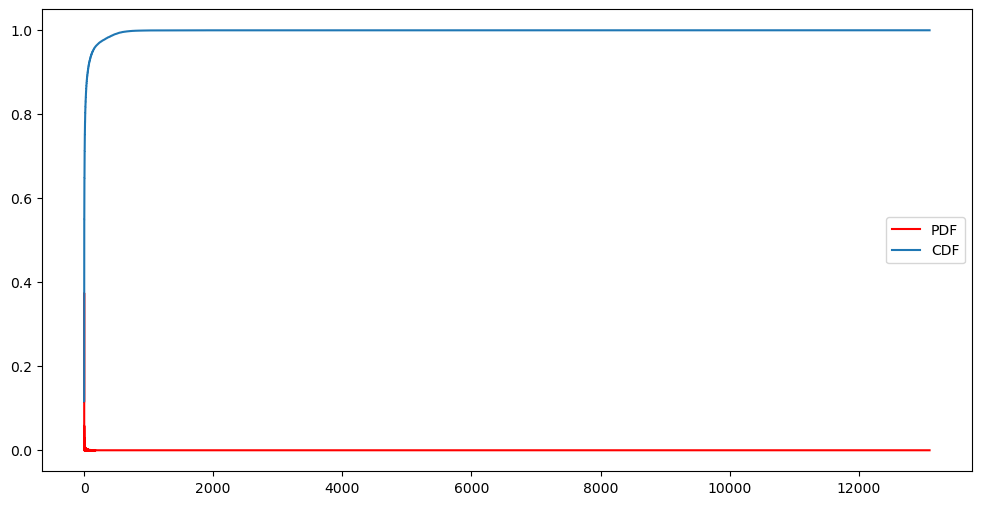

In [4]:
# # plot URL index vs upvotes
# plt.figure(figsize=(12, 6))
# lib_df_upvote.num_upvotes.plot.line()
# plt.show()
# # plot PDF of upvotes
# plt.figure(figsize=(12, 6))
# lib_df_upvote.num_upvotes.plot.kde()
# plt.show()

# plot CDF of upvotes
plt.figure(figsize=(12, 6))
count, bins_count = np.histogram(lib_df.num_upvotes.values, bins=len(lib_df.num_upvotes.values))
# finding the PDF of the histogram using count values
pdf = count / sum(count)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.show()

In [5]:
# Conservative data
con_df = pd.read_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799.csv")
print(con_df.shape)
con_df_upvote, con_df_upvote_top100 = get_upvoted_URLs(df=con_df, n=100)
print(con_df_upvote.shape)
print(con_df_upvote_top100.shape)
print(con_df_upvote_top100.head)
con_df_upvote.to_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799_UpvotesOnly.csv")
con_df_upvote_top100.to_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799_UpvotesOnlyTop100.csv")

(577388, 7)
(522523, 8)
(100, 8)
<bound method NDFrame.head of      index     ids                                                url  \
0   482932  krynan              https://www.reddit.com/gallery/krxl6t   
1   427866  jpuut2  https://apnews.com/article/Biden-Trump-US-elec...   
2   466397  kifvsl                      https://imgur.com/WY5NwZR.jpg   
3   476578  kw4caq  https://www.foxnews.com/politics/mcconnell-bel...   
4   467128  khk7w5  https://conservativechoicecampaign.com/amazing...   
..     ...     ...                                                ...   
95  407248  izpvl2  https://www.npr.org/2019/11/25/782842651/trump...   
96  447768  k0zib6  https://www.newsmax.com/politics/trump-troops-...   
97  491087  laut43  https://www.washingtontimes.com/news/2021/feb/...   
98  513407  mjz6t6  https://www.washingtonexaminer.com/news/charle...   
99  514256  mispk5  https://www.foxnews.com/politics/matt-gaetz-co...   

    created_utc        author  num_upvotes  num_comments  \


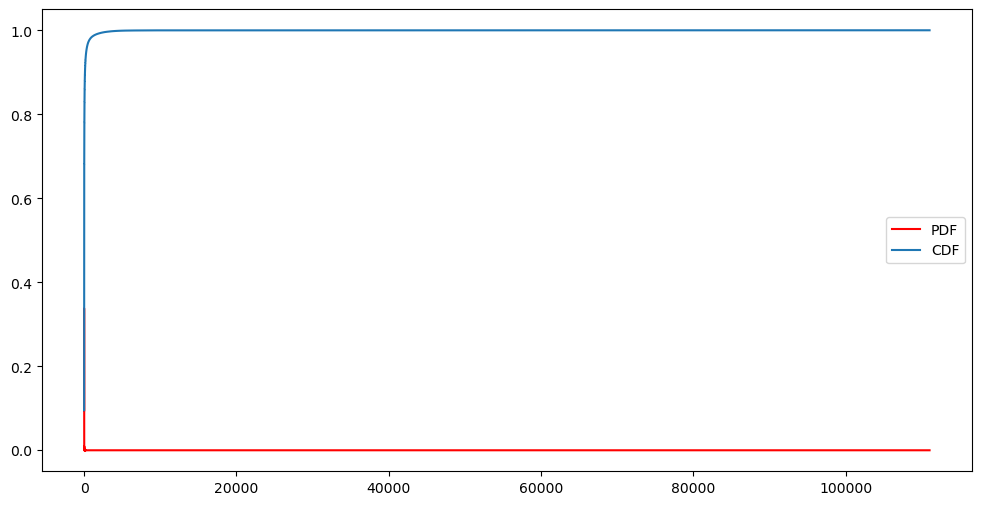

In [6]:
# # plot conserv upvote distribution
# plt.figure(figsize=(12, 6))
# con_df_upvote.num_upvotes.plot.line()
# plt.show()

# # plot PDF of upvotes
# plt.figure(figsize=(12, 6))
# con_df_upvote.num_upvotes.plot.kde()
# plt.show()

# plot CDF of upvotes
plt.figure(figsize=(12, 6))
count, bins_count = np.histogram(con_df.num_upvotes.values, bins=len(con_df.num_upvotes.values))
# finding the PDF of the histogram using count values
pdf = count / sum(count)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.show()

### URL-domain based URL selection

In [7]:
def extract_domain(df):
    url_list = list(df.url)
    domain_list = []
    for URL in url_list:
        attributes = tldextract.extract(URL)
        domain_list.append(attributes.domain)

    domain_df = pd.DataFrame({ "url_domain" : domain_list })
    df_concat = pd.concat([df, domain_df], axis=1)

    return df_concat

def get_domain_ordered_URLs(df, n):
    # use groupby, count() and sort_values()
    df['Frequency'] = df.groupby('url_domain')['url_domain'].transform('count')
    df = df.sort_values('Frequency', ascending=False)
    df = df.reset_index()
    df_domainFreq_samplen = df.sample(n, random_state=42)
    df.reset_index(drop=True, inplace=True)
    
    return df, df_domainFreq_samplen

In [8]:
# Liberal data
lib_df = pd.read_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799.csv")
print(lib_df.shape)

lib_domain_df = extract_domain(lib_df)
print(lib_domain_df.shape)
print(lib_domain_df.head)
lib_domain_df.to_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799_domainAdded.csv")

lib_df_domainFreq, lib_df_domainFreq_sample100 = get_domain_ordered_URLs(df=lib_domain_df, n=100)
print(lib_df_domainFreq.shape)
print(lib_df_domainFreq_sample100.shape)
print(lib_df_domainFreq_sample100.head)
lib_df_domainFreq.to_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799_domainFreqAdded.csv", index=False)

(48605, 7)
(48605, 8)
<bound method NDFrame.head of           ids                                                url  \
0       8le4t  http://mytinyspot.blogspot.com/2009/05/as-gop-...   
1       8l08o         http://www.youtube.com/watch?v=MG4FSCY9Luc   
2       8kneq         http://whohijackedourcountry.blogspot.com/   
3       8k0sf  http://www.rockridgeinstitute.org/research/roc...   
4       8jdfj         http://www.youtube.com/watch?v=nYpnB0ay_64   
...       ...                                                ...   
48600  otmwtj  https://www.reddit.com/r/Liberal/comments/otmw...   
48601  otmlff  https://www.reddit.com/r/Liberal/comments/otml...   
48602  otkzp2  https://www.reddit.com/r/Liberal/comments/otkz...   
48603  otk0tu  https://www.reddit.com/r/Liberal/comments/otk0...   
48604  otio9h  https://www.reddit.com/r/Liberal/comments/otio...   

        created_utc           author  num_upvotes  num_comments      flair  \
0      1.242680e+09       Screedname            0    

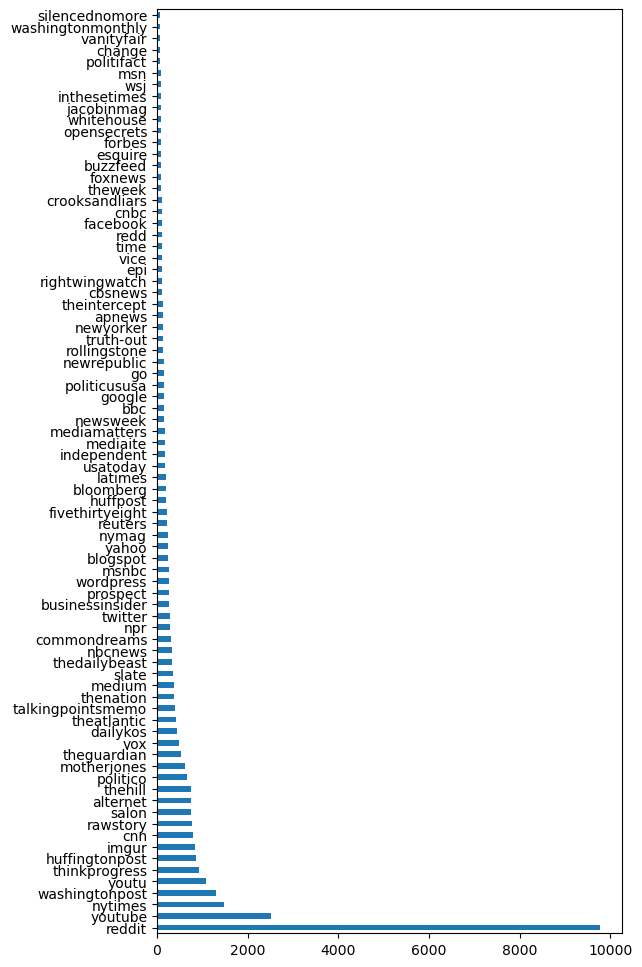

In [9]:
# plot lib url_domain distribution
# lib_df_domainFreq.url_domain.value_counts()[:100]
plt.figure(figsize=(6, 12))
lib_df_domainFreq.url_domain.value_counts()[:80].plot(kind='barh')
plt.show()

In [10]:
def remove_rows_w_col_vls(df, filters):
    # Get indexes where url_domain column has value filter
    for filter in filters:
        idxs = df[(df['url_domain'] == filter)].index
        # Delete these row indexes from dataFrame
        df.drop(idxs, inplace=True)
    
    return df

In [11]:
# Filter (remove youtube, youtu, imgur, redd, and twitter)

filters = ["youtube", "youtu", "imgur", "redd",  "twitter", "reddit", "facebook", "reddituploads", "redditmedia"]

lib_df_domainFreq_filtered = lib_df_domainFreq.copy()
print(lib_df_domainFreq_filtered.shape)
lib_df_domainFreq_filtered = remove_rows_w_col_vls(lib_df_domainFreq_filtered, filters)
print(lib_df_domainFreq_filtered.shape)
lib_df_domainFreq_filtered = lib_df_domainFreq_filtered.drop(columns=['index'])
lib_df_domainFreq_filtered.to_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799_domainFreqAddedFiltered.csv", index=False)

(48605, 10)
(33851, 10)


In [12]:
# Conservative data
con_df = pd.read_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799.csv")
print(con_df.shape)

con_domain_df = extract_domain(con_df)
print(con_domain_df.shape)
print(con_domain_df.head)
con_domain_df.to_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799_domainAdded.csv")

con_df_domainFreq, con_df_domainFreq_sample100 = get_domain_ordered_URLs(df=con_domain_df, n=100)
print(con_df_domainFreq.shape)
print(con_df_domainFreq_sample100.shape)
print(con_df_domainFreq_sample100.head)
con_df_domainFreq.to_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799_domainFreqAdded.csv", index=False)

(577388, 7)
(577388, 8)
<bound method NDFrame.head of            ids                                                url  \
0        68lfw  http://www.freerepublic.com/focus/f-news/19689...   
1        67npy  http://www.cbsnews.com/stories/2008/01/21/opin...   
2        67n8x               http://www.tsowell.com/speducat.html   
3        67n1u  http://whoisioz.blogspot.com/2008/01/searing-v...   
4        67n0j  http://www.becker-posner-blog.com/archives/200...   
...        ...                                                ...   
577383  oy14da  https://newsbreakforum.com/story/mexico-sues-r...   
577384  oy138v                       https://youtu.be/DVroxCPrm_Q   
577385  oy10ec                https://i.redd.it/uw1sk15fdef71.jpg   
577386  oy0zs8  https://www.reddit.com/r/Conservative/comments...   
577387  oy0zok        https://www.youtube.com/watch?v=LamRwl5Z2qk   

        created_utc         author  num_upvotes  num_comments flair  \
0        1202901623    unkorrupted            

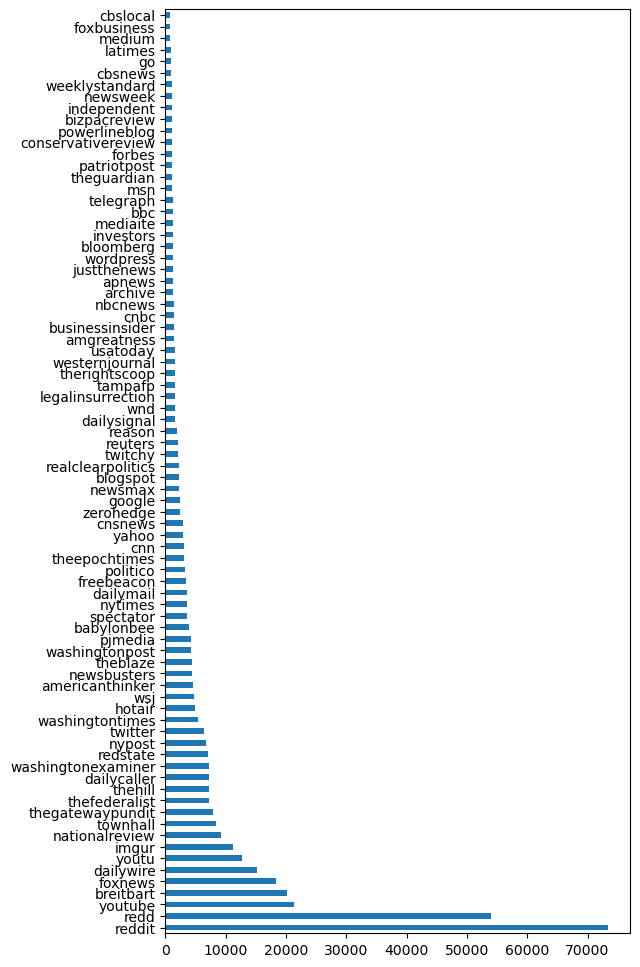

In [13]:
# plot conserv url_domain distribution
# con_df_domainFreq.url_domain.value_counts()[:100]
plt.figure(figsize=(6, 12))
con_df_domainFreq.url_domain.value_counts()[:80].plot(kind='barh')
plt.show()

In [14]:
# Filter (remove youtube, youtu, imgur, redd, and twitter)

con_df_domainFreq_filtered = con_df_domainFreq.copy()
print(con_df_domainFreq_filtered.shape)
con_df_domainFreq_filtered = remove_rows_w_col_vls(con_df_domainFreq_filtered, filters)
print(con_df_domainFreq_filtered.shape)
con_df_domainFreq_filtered = con_df_domainFreq_filtered.drop(columns=['index'])
con_df_domainFreq_filtered.to_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799_domainFreqAddedFiltered.csv", index=False)

(577388, 10)
(397056, 10)


## Plots for the paper

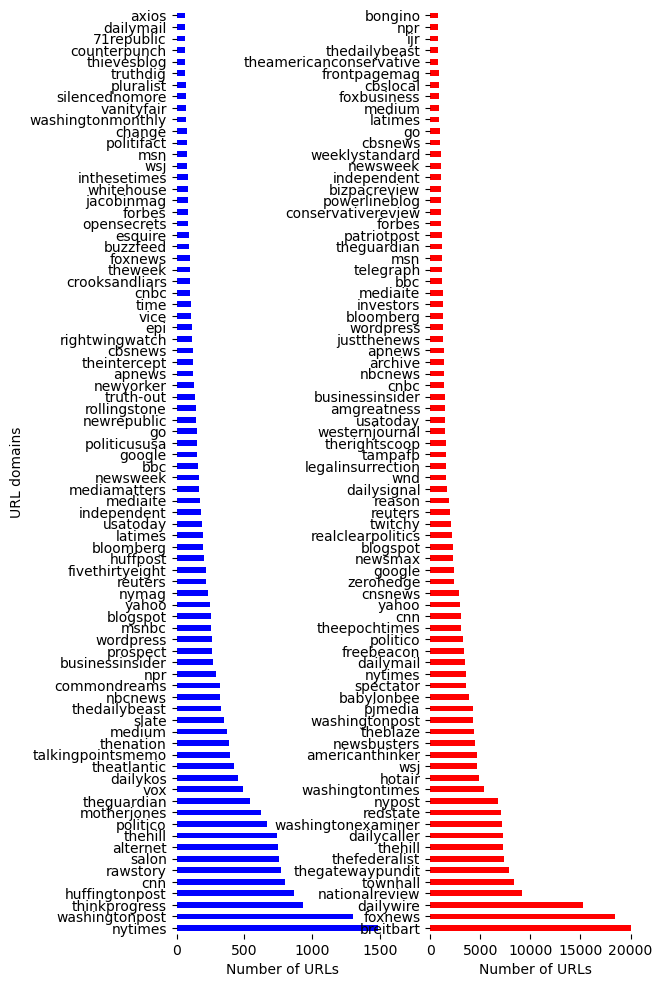

In [15]:
# Distribution of domains of the collected URLs

URL_dist = plt.figure(figsize=(6, 12))
plt.subplot(1,2,1)
ax=plt.gca()
# plot lib_df_domainFreq_filtered url_domain distribution
lib_df_domainFreq_filtered.url_domain.value_counts()[:80].plot(kind='barh', color="blue")
ax.set_frame_on(False)
plt.ylabel("URL domains")
plt.xlabel("Number of URLs")

plt.subplot(1,2,2)
ax=plt.gca()
# plot con_df_domainFreq_filtered url_domain distribution
con_df_domainFreq_filtered.url_domain.value_counts()[:80].plot(kind='barh', color="red")
ax.set_frame_on(False)
plt.xlabel("Number of URLs")

plt.show()
URL_dist.savefig('../URL_dist.svg', format='svg', dpi=1200, bbox_inches='tight')

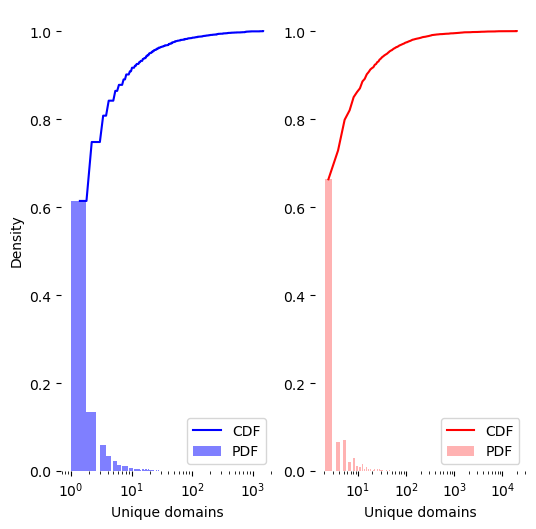

In [16]:
# PDF and CDF of domains of the collected URLs

# plot CDF of url_domain counts
URL_pdf_cdf = plt.figure(figsize=(6, 6))
plt.subplot(1,2,1)
ax=plt.gca()
count, bins_count = np.histogram(lib_df_domainFreq_filtered.url_domain.value_counts(), bins=len(lib_df_domainFreq_filtered.url_domain.value_counts()))
# finding the PDF of the histogram using count values
pdf = count / sum(count)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
# plotting PDF and CDF
plt.bar(bins_count[1:], pdf, color="blue", alpha=0.5, linestyle='dashed', label="PDF")
plt.plot(bins_count[1:], cdf, color="blue", label="CDF")
plt.legend()
ax.set_frame_on(False)
ax.set_xscale('log')
plt.xlabel("Unique domains")
plt.ylabel("Density")

# plot CDF of url_domain counts
plt.subplot(1,2,2)
ax=plt.gca()
count, bins_count = np.histogram(con_df_domainFreq_filtered.url_domain.value_counts(), bins=len(con_df_domainFreq_filtered.url_domain.value_counts()))
# finding the PDF of the histogram using count values
pdf = count / sum(count)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
# plotting PDF and CDF
plt.bar(bins_count[1:], pdf, color="red", linestyle='dashed', alpha=0.3, label="PDF")
plt.plot(bins_count[1:], cdf, color="red", label="CDF")
plt.legend()
ax.set_frame_on(False)
ax.set_xscale('log')
plt.xlabel("Unique domains")

plt.show()
URL_pdf_cdf.savefig('../URL_pdf_cdf.svg', format='svg', dpi=1200, bbox_inches='tight')